# Disease Prediction System

We will build a Disease Prediction System that takes user symptoms as input and predicts possible diseases using machine learning models. This project will use a dataset containing patient symptoms and diagnoses.

Tech Stack
- Python (for data processing & model training)
- Scikit-learn (for machine learning)
- Pandas, NumPy (for data handling)
- Flask or FastAPI (for API deployment)
- React/Next.js or Streamlit (for frontend visualization, optional)

## Get dataset

In [43]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pasindueranga/disease-prediction-based-on-symptoms")

In [44]:
print(os.listdir(path))

['dataset.csv']


In [45]:
import pandas as pd
import os

csv_file= os.path.join(path, "dataset.csv")

df= pd.read_csv(csv_file)

df.head()

,disease,symptoms,cures,doctor,risk level
0,flu,"fever,cough,sore throat,runny or stuffy nose,m...","over-the-counter medications,rest,fluids","family doctor,urgent care",low (0.1%
1,bronchitis,"cough,mucus production,shortness of breath,che...","antibiotics,over-the-counter medications,rest,...","family doctor,pulmonologist",low (0.5%
2,pneumonia,"fever,cough,shortness of breath,chest pain,fat...","antibiotics,over-the-counter medications,rest,...","family doctor,pulmonologist",moderate (1%)
3,heart attack,"chest pain,shortness of breath,nausea,vomiting...",emergency medical services,cardiologist,high (20%)
4,stroke,"sudden weakness,numbness on one side of the bo...",emergency medical services,neurologist,high (15%)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disease     99 non-null     object
 1   symptoms    99 non-null     object
 2   cures       99 non-null     object
 3   doctor      99 non-null     object
 4   risk level  99 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


In [47]:
df.columns

Index(['disease', 'symptoms', 'cures', 'doctor', 'risk level'], dtype='object')

In [48]:
df.isnull().sum()

,0
disease,0
symptoms,0
cures,0
doctor,0
risk level,0


## Data Report

No null values

Columns: ['disease', 'symptoms', 'cures', 'doctor', 'risk level']

Data type:
- disease: string: Categorical(Nominal)
- symptoms: string: Categorical(Nominal)
- cures: string: Categorical(Nominal)
- doctor: string: Categorical(Nominal)
- risk level: string: Categorical(Ordinal)

## Data preprocessing

In [61]:
processed_df = pd.DataFrame()

### disease

In [49]:
print("There are ", df["disease"].isnull().sum(), " null values in disease column")

There are  0  null values in disease column


In [50]:
df["disease"].unique()

array(['flu', 'bronchitis', 'pneumonia', 'heart attack', 'stroke',
       'cancer', 'diabetes', "alzheimer's disease", 'arthritis',
       'adenovirus', 'aflatoxicosis', 'alcoholism', 'allergic rhinitis',
       'anemia', 'anxiety disorder', 'appendicitis', 'asperger syndrome',
       'asthma', 'bacterial meningitis', 'bipolar disorder',
       'bladder cancer', 'blood clot', 'bursitis', 'cervical cancer',
       'chickenpox', 'chronic obstructive pulmonary disease (copd)',
       'cholesterol', 'common cold', 'conjunctivitis', 'depression ',
       'diarrhea', 'eating disorder', 'epilepsy', 'fever',
       'food poisoning', 'gallstones', 'gonorrhea', 'heart disease',
       'hepatitis', 'herpes', 'influenza',
       'irritable bowel syndrome (ibs)', 'kidney stones ', 'lung cancer',
       'malaria', 'measles', 'meningitis', 'mononucleosis', 'rabies',
       'salmonella', 'shingles', 'tuberculosis (tb)',
       'urinary tract infection (uti)', 'varicose veins', 'warts ',
       'yeast 

In [51]:
print("No of unique disease: ", len(df["disease"].unique()))

No of unique disease:  88


In [37]:
print("No of disease rows that comtains comma: ",len(df[df["disease"].str.contains(",", regex=False, na=False)]))

No of disease rows that comtains comma:  0


In [52]:
df["disease"] = df["disease"].str.lower()

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
processed_df["disease_encoded"] = le.fit_transform(df["disease"])

In [63]:
processed_df["disease_encoded"]

,disease_encoded
0,46
1,21
2,72
3,53
4,79
...,...
94,41
95,45
96,51
97,52


In [56]:
disease_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(disease_mapping)

{'acanthamoebkeratitis': 0, 'acute appendicitis': 1, 'acute kidney injury (aki) ': 2, 'adenovirus': 3, 'aflatoxicosis': 4, 'alcoholism': 5, 'allergic rhinitis': 6, "alzheimer's disease": 7, 'anemia': 8, 'anxiety disorder': 9, 'aortic aneurysm': 10, 'appendicitis': 11, 'arthritis': 12, 'asperger syndrome': 13, 'asthma': 14, 'atopic dermatitis': 15, 'bacterial meningitis': 16, 'bacterial meningitis ': 17, 'bipolar disorder': 18, 'bladder cancer': 19, 'blood clot': 20, 'bronchitis': 21, 'bursitis': 22, 'cancer': 23, 'celiac disease': 24, 'cervical cancer': 25, 'cervical cancer ': 26, 'chickenpox': 27, 'cholesterol': 28, 'chronic kidney disease': 29, 'chronic obstructive pulmonary disease (copd)': 30, 'colorectal cancer': 31, 'common cold': 32, 'conjunctivitis': 33, "crohn's disease": 34, 'dementia': 35, 'depression ': 36, 'diabetes': 37, 'diarrhea': 38, 'eating disorder': 39, 'epilepsy': 40, 'epilepsy ': 41, 'erectile dysfunction': 42, 'fever': 43, 'fibromyalgi': 44, 'fibromyalgia': 45, '

### symptoms

In [57]:
df["symptoms"] = df["symptoms"].str.lower()

In [58]:
df["symptoms"] = df["symptoms"].apply(lambda x: x.split(","))

In [59]:
df["symptoms"].head()

,symptoms
0,"[fever, cough, sore throat, runny or stuffy no..."
1,"[cough, mucus production, shortness of breath,..."
2,"[fever, cough, shortness of breath, chest pain..."
3,"[chest pain, shortness of breath, nausea, vomi..."
4,"[sudden weakness, numbness on one side of the ..."


In [64]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

symptoms_encoded = mlb.fit_transform(df["symptoms"])

symptom_df = pd.DataFrame(symptoms_encoded, columns=mlb.classes_)

processed_df = pd.concat([processed_df, symptom_df], axis=1)

processed_df.head()

,disease_encoded,abdominal cramps,abdominal pain,abnormal pap test results,abnormal vaginal bleeding,aerophobia,anxiety that interfere with daily life,bladder habits,bloating,blood in the sputum,...,warmth,watery eyes,watery stools,weight loss,wheezing,which is an overactive thyroid,which is an underactive thyroid,which is small sac of fluid that cushions joints,widespread pain,withdrawal symptoms
0,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,79,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### risk level

In [70]:
df["risk level"].unique()

array(['low (0.1%', 'low (0.5%', 'moderate (1%)', 'high (20%)',
       'high (15%)', 'varies depending on the type of cancer',
       'high (25%)', 'high (70%)',
       'varies depending on the type of arthritis', 'low (0.1%)',
       'varies depending on the type of anemia',
       'varies depending on the type of anxiety disorder', 'varies',
       'low (0.5%)', 'varies depending on the bursa',
       'varies depending on the type of copd ',
       'varies depending on the level of cholesterol',
       'varies depending on the type of eating disorder',
       'varies depending on the type of epilepsy',
       'varies depending on the type of hepatitis', 'moderate (1%'],
      dtype=object)

In [80]:
import re

df["risk level corrected"] = df["risk level"].apply(lambda x: re.match(r"low|moderate|high", x.lower()).group(0) if re.match(r"low|moderate|high", x.lower()) else "unknown")

In [81]:
df.head()

,disease,symptoms,cures,doctor,risk level,disease_encoded,abdominal cramps,abdominal pain,abnormal pap test results,abnormal vaginal bleeding,...,watery eyes,watery stools,weight loss,wheezing,which is an overactive thyroid,which is an underactive thyroid,which is small sac of fluid that cushions joints,widespread pain,withdrawal symptoms,risk level corrected
0,flu,"[fever, cough, sore throat, runny or stuffy no...","over-the-counter medications,rest,fluids","family doctor,urgent care",low (0.1%,46,0,0,0,0,...,0,0,0,0,0,0,0,0,0,low
1,bronchitis,"[cough, mucus production, shortness of breath,...","antibiotics,over-the-counter medications,rest,...","family doctor,pulmonologist",low (0.5%,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,low
2,pneumonia,"[fever, cough, shortness of breath, chest pain...","antibiotics,over-the-counter medications,rest,...","family doctor,pulmonologist",moderate (1%),72,0,0,0,0,...,0,0,0,0,0,0,0,0,0,moderate
3,heart attack,"[chest pain, shortness of breath, nausea, vomi...",emergency medical services,cardiologist,high (20%),53,0,0,0,0,...,0,0,0,0,0,0,0,0,0,high
4,stroke,"[sudden weakness, numbness on one side of the ...",emergency medical services,neurologist,high (15%),79,0,0,0,0,...,0,0,0,0,0,0,0,0,0,high


In [87]:
risk_mapping = {"low": 0, "moderate": 1, "high": 2, "unknown": -1}


processed_df["risk_level_encoded"] = df["risk level corrected"].map(risk_mapping)


In [88]:
processed_df.head()

,disease_encoded,abdominal cramps,abdominal pain,abnormal pap test results,abnormal vaginal bleeding,aerophobia,anxiety that interfere with daily life,bladder habits,bloating,blood in the sputum,...,watery eyes,watery stools,weight loss,wheezing,which is an overactive thyroid,which is an underactive thyroid,which is small sac of fluid that cushions joints,widespread pain,withdrawal symptoms,risk_level_encoded
0,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,79,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## Visualization

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

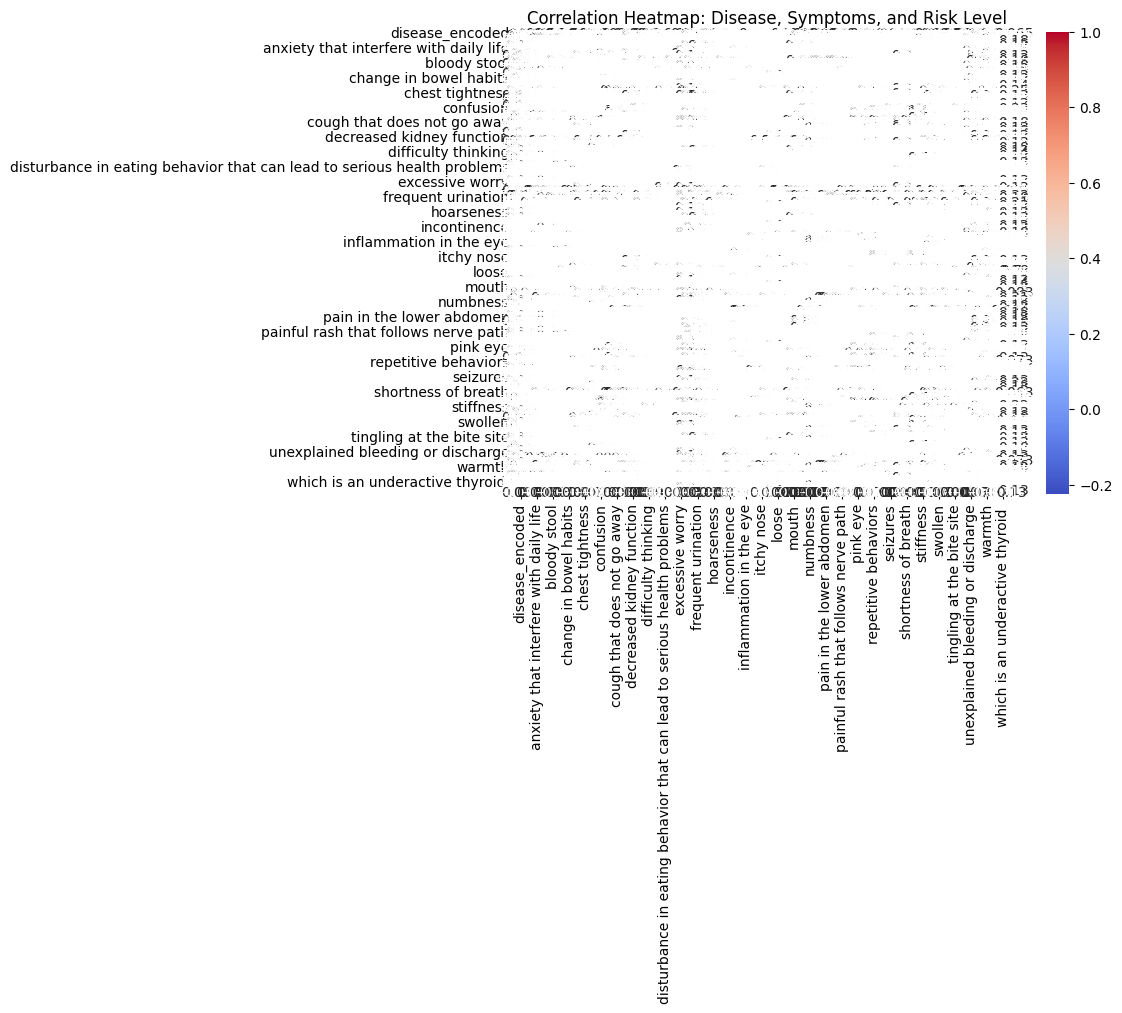

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(processed_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Disease, Symptoms, and Risk Level")
plt.show()

## Feature engineering

In [91]:
X= processed_df.drop(columns=["disease_encoded", "risk_level_encoded"])
y= processed_df["disease_encoded"]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [95]:
print(y_test, y_pred)

62     0
40    48
95    45
18    13
97    52
84    75
64     2
42    54
10     4
0     46
31    32
76    55
47    61
26    23
44    57
4     79
22    19
12     6
88    82
73    42
Name: disease_encoded, dtype: int64 [12  1 44 39 39 12 39  8 47 58 66 39 47 23 39 79 83 77 34 39]


In [96]:
# Decode disease predictions back to names
y_pred_labels = le.inverse_transform(y_pred)

# Decode actual disease labels
y_test_labels = le.inverse_transform(y_test)

# Show some predictions
predictions_df = pd.DataFrame({"Actual Disease": y_test_labels, "Predicted Disease": y_pred_labels})
print(predictions_df.head(10))

               Actual Disease   Predicted Disease
0        acanthamoebkeratitis           arthritis
1                  gallstones  acute appendicitis
2                fibromyalgia         fibromyalgi
3           asperger syndrome     eating disorder
4    hashimoto's thyroiditis      eating disorder
5        rheumatoid arthritis           arthritis
6  acute kidney injury (aki)      eating disorder
7               heart disease              anemia
8               aflatoxicosis      food poisoning
9                         flu           influenza
